# CA ASTRO - Data Science and ML Workshop

**Author** : Victor Calderon

**Date** : 13th and 14th of June, 2020

## Supervised learning - Example using `Scikit-Learn`

There are several useful libraries in Python that provide a solid implementation of machine learning algorithms.
Possibly, the most famous one is [Scikit-Learn](https://scikit-learn.org/stable/), a package that provides
efficient and user-friendly version of the most common ML algorithms, including but not limited to

- Random Forest
- Logistic Regression
- Principal Component Analysis (PCA)
- TSNE (another clustering algorithm)
- and many more.

This library contains very useful tools for examine datasets, create and evaluate ML models, and more.

### Iris dataset

This is perhaps the best known database to be found in the machine learning 
literature. The data set contains 3 different classes of 50 instances each,
where each class refers to a type of *iris* plant. One class is linearly
separable from the other 2; the latter are **not** linearly separable from
each other.

**Main goal**:

- To train a ML model that is able to *correctly* categorize or predict each
  observation into one of the three *species* of irises based on 4 different
  *features*, i.e. sepal's width and height and those of the petal.

#### Step 1: Download the dataset from `seaborn`'s database

This datasets, given that it's one of the most well-known datasets for 
machine learning, comes pre-packaged into `seaborn`, so that we can easily
import it as a Pandas DataFrame. But first, we must import some submodules

##### Importing modules

In [1]:
%matplotlib inline
%load_ext lab_black

import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import numpy as np

rc("text", usetex=False)

sns.set()

import matplotlib

matplotlib.rc("text", usetex=False)

We can now import the whole database and do some EDA on it:

In [2]:
# Loading in the Iris dataset
iris = sns.load_dataset("iris")

#### Step 2: Exploratory Data Analysis (EDA)

The next step is to perform some data exploration of this dataset.

There are a few things to look for:

- **Shape** : Look at the total number of rows and columns in the dataset.
- **Summary Statistics** : This step will show you the `min`, `max`, `mean`,
  and other summary statistics of each column in the dataset. This step is
  very useful to understand the **ranges** of each column, as it will be
  needed to know for normalizing the dataset.
- **Unique catogories**: This mainly applies to categorical variables, such
  as the column `species` in the dataset. It is important to know if the
  the dataset is **balanced** or not, i.e. if there are more observations of
  one class than the rest. When having an *unbalanced* dataset, sometimes
  it will affect *performance metrics*, such as **accuracy**, **precision**,
  **recall**, and **F1 score**. This [link](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18) provides a good summary of what to do when you're presented
  with an unbalanced dataset.
- **Data types**: It is very important to know the type of variable
  in each column, i.e. are the values of column `X` *integers*,
  *floats*, *strings*, etc. This step is important to know since some
  algorithms and packages deal with datasets differently (see
  [h2o](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)
  for example, since it handles `strings` differently than `floats` and
  others).

**Shape**

Let's look at the overall structure of the dataset

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Rows and columns in the dataset
print("There are `{0}` rows and `{1}` columns".format(*iris.shape))

There are `150` rows and `5` columns


In [5]:
# Column names
colnames_arr = "\n\t- ".join(iris.columns)

print("The column names in the `iris` dataset are:" + "\n\n\t- " + colnames_arr)

The column names in the `iris` dataset are:

	- sepal_length
	- sepal_width
	- petal_length
	- petal_width
	- species


This shows that the `iris` datasets has **5 columns** and **150**
rows.

**Data Types**

The easiest way to look at the *data types* of each column in the
DataFrame is through the `info()` function:

In [6]:
iris.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This fuctions shows us that:

- The `species` column is an `object`. This means that this column is
  comprised of `strings`.
- The `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` are
  all `float` variables. This will become apparent when we look at the
  summary statistics of the dataset, as it displays the statistics for
  numeric types *by default*.

**Summary Statistics**

The next step is to look at the summary statistics of this dataset

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Unless one is very familiar with a this dataset, it *not* straightforward
to know if these ranges are good or not. However, the `describe()`
function allows us to look at the `min`, `max` and `mean` for each
column separately.

Since we're interested in looking at the different `distributions`
of each column and, especially, look for any correlation between the
different columns, we can use the Seaborn's function `pairplot` to create
a figure that shows us all of this at once:

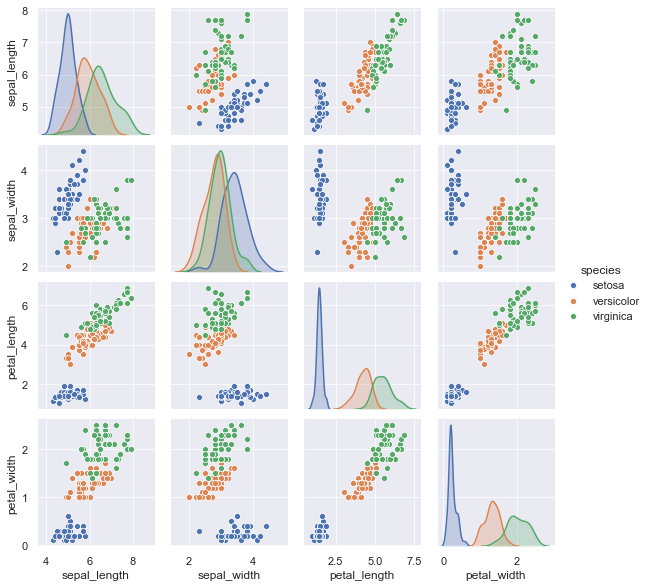

In [8]:
sns.pairplot(iris, hue="species", height=2.0)

From this matrix, we can see some of the important aspects of this dataset:

1. There are `3` main species, each with a different distribution for the
   sepal's width and height and those of the petal.

2. There are some clear outliers in the measurements

3. 2 of the 3 species are *similir* in **feature-space**, i.e. they share
   similar trends when plotting the 4 different features one against another.
   `Versicolor` and `Virginica` share common features, while `Setosa` can be
   clearly separated from the other 2 on this feature-space.

Judging from this figure, the three species (`setosa`, `versicolor`, and 
`virginica`) form distinct groups
when plotting one *feature* against other features.

Let's look at the distribution of the different *features* for each type of iris. To simplify this,
we can modify the dataset to simplify this process with the help of the function `pandas.melt`

In [9]:
# Modifiying the `iris` dataset to make it easier to plot
iris_melt = pd.melt(iris, id_vars=["species"], var_name="iris_type", value_name="value")

iris_melt.head()

,species,iris_type,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


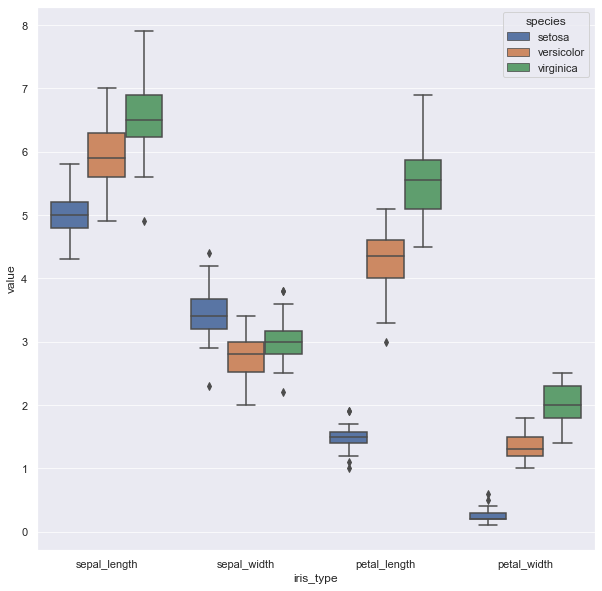

In [10]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="iris_type", y="value", hue="species", data=iris_melt)

One can draw similar conclusions than the ones before:

- The ranges for the `versicolor` and `virginica` species are similar for
  some columns, while the range of values for the `setosa` class are
  statistically different than the rest.

The next step is look at whether the dataset if **balanced** or not.

**Unique categories**

We are now interested in checking whether or not the dataset if balanced,
i.e. if there is one or more classes with a **higher number** of observations
than the rest of observations.

We can use the `value_counts()` function to explore this:

In [11]:
# Checking whether or not the dataset is balanced
iris["species"].value_counts().to_frame()

,species
virginica,50
setosa,50
versicolor,50


However, for future reference, we can also include the *percentages* of
each class by using the `normalize = True` argument:

In [12]:
# Now we can compute the "percentage" of each class in the `species` column
iris["species"].value_counts(normalize=True).to_frame()

,species
virginica,0.333333
setosa,0.333333
versicolor,0.333333


To make our lives easier, we can create a single DataFrame that shows these
numbers together:

In [13]:
# Normalized version of the `species` column
species_normed = iris["species"].value_counts(dropna=False, normalize=True).to_frame()

# Total number of counts per "class" in the `species` column
species_counts = iris["species"].value_counts(dropna=False, normalize=False).to_frame()

# We can now merged them together.
# I'm renaming the column names to make them easier to get merged
species_merged = pd.merge(
    species_normed.rename(columns={"species": "perc"}),
    species_counts.rename(columns={"species": "counts"}),
    left_index=True,
    right_index=True,
)

species_merged

,perc,counts
virginica,0.333333,50
setosa,0.333333,50
versicolor,0.333333,50


The `species_merged` DataFrame shows that all 3 classes have the *same*
number of observations, and thus, the **dataset is balanced**.

**Main Takeaways**:

>- Make sure your data is encoded properly (datatypes)
>- Make sure the data falls within the expected range, and use *domain
>  knowledge* whenever possible to define that expected range.
>- Deal with missing data in our way or another. Replace it if you can or just >  `drop` it.
>- Never tidy your data manually because that is NOT easily reproducible by
>  others.
>- Use code as a **record** of how you cleaned your data.
>- Plot everything you can about the dataset at this stage of the analysis
>  so you can *visually* confirm if the dataset looks correct. This will also
>  help in detecting *outliers*, which you can decide how to deal with them
>  later on.

#### Step 3: Classification and ML model

The next step is to develop a ML model for classifying the different classes
of irises based on the 4 different **features**, i.e.
the sepal's and petal's width and height. The approach that we will
take is:

1. Create training and testing datasets with a `80-20` proportion.
2. Train a ML model on the training dataset.
3. Compute the performance of the model using the `testing` dataset.

A **training set** is a *random* subset of the data that we use to train
our model.

A **testing set** is a *random* subset of the data (mutually exclusive
from the training set, i.e. an observation can only be in either the
testing or training set, but it cannot be in *both*!). This dataset
is used for **validating** the model on unforseen data.

##### Step 3.1 - Splitting data into `training` and `testing` dataset

The next step is to create a set of `training` and `testing` dataset:

In [14]:
from sklearn.model_selection import train_test_split

We now separate our **features** from the **target** variable:

In [15]:
# Separating target and feature arrays
X = iris[[xx for xx in iris.columns if xx != "species"]].values
y = iris["species"].values

These look like this:

In [16]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [17]:
y[:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

We can now use these to create our *training* and *testing* datasets:

In [18]:
# Separating between training and testing X's and y's
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

print("`X_train`: {0}".format(X_train.shape))
print("`Y_train`: {0}".format(Y_train.shape))
print("`X_test`: {0}".format(X_test.shape))
print("`Y_test`: {0}".format(Y_test.shape))

`X_train`: (120, 4)
`Y_train`: (120,)
`X_test`: (30, 4)
`Y_test`: (30,)


##### 3.2 - Training model using the `training` dataset

With this data split, we can now start fitting models to our dataset.
We will train a `Random Forest` (RF) using this data, and predict the
classes of the **testing** dataset. This will allow us to determine the
performance of the *classifier* and evaluate if the model is *overfitting*
or not.

**Importing packages and defining the classifier**

The following will import the necessary packages and it will *instantiate*
the `RandomForestClassifier` object with a random *seed*:

In [19]:
# Importing Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

> One important tip is to include a `random_state` (analogous to random
> seed) so that the results can be reproduced by others!

In [20]:
# Defining model object
model = RandomForestClassifier(random_state=9)

**Training phase**

We can now fit the model to our **training** data. This step is commonly
known as the **training phase** of a machine learning model:

In [21]:
# Fittig model to training dataset
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=9)

**Validating results of the classifier**

We can first look at the *classification accuracy* using the `score` function:

In [22]:
model.score(X_test, Y_test)

0.9666666666666667

This shows that the **classification accuracy** of this classifier is of
`~96.66%` using the testing dataset!!

##### 3.3 - Cross-validation of the scoring process

> However, this number might be misleading, since it's based on a single
> training-testing split. Ideally, we want to compare the accuracy of 
> multiple runs of training and scoring phases. This can be achieved with
> `cross-validation` or `K-fold` cross-validation

In [23]:
from sklearn.model_selection import cross_val_score

We can now compute the score of **multiple** runs of this process:

In [24]:
# Total number of cross-validations to perform
cv = 5

cv_scores = cross_val_score(model, X, y, cv=5)

The results of said cross-validation stage are

In [25]:
cv_scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

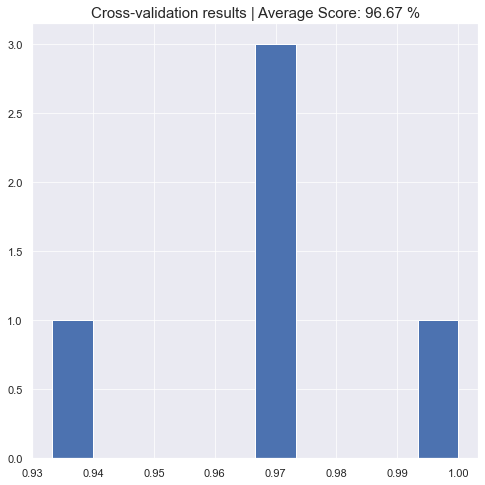

In [26]:
# Visualizing scores for the different Cross-validation runs
plt.figure(figsize=(8, 8))
plt.title(
    "Cross-validation results | Average Score: {0:.2f} %".format(
        100 * cv_scores.mean()
    ),
    fontsize=15,
)
a = plt.hist(cv_scores)

##### 3.5 - Classification Report

Additionally, we can create a classification report for the model:

In [27]:
from sklearn.metrics import classification_report

In [28]:
# Predict classifications using the testing dataset
y_pred = model.predict(X_test)

We can easily compare the `y_pred` to the `Y_test` to check how well the
model classified each observation in the *testing* dataset:

In [29]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.83      0.91         6
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



This shows that the accuracy is `~97%` as we saw earlier. This also includes
several other metrics, such as:

- Precision
- Recall
- F1-score

These metrics are used for quantifying the performance of the model

##### 3.4 - Confusion Matrix

Another way of looking at the results of a classifier is to look at the
`confusion matrix`:

> It is a specific table layout that allows visualization of the performance
> of an algorithm, typically a supervised learning. Each row of the matrix
> represents the instances in a predicted class, while each column represents
> the instance sin an actual class (or vice-versa).

<small>*Source*: Wikipedia [link](https://en.wikipedia.org/wiki/Confusion_matrix)</small>


In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
# Confusion matrix for the model
confusion_arr = confusion_matrix(Y_test, y_pred, labels=iris["species"].unique(), normalize="true")

# Labels for each species
true_labels = iris["species"].unique()
pred_labels = [xx + "_pred" for xx in true_labels]

# Converting to Pandas DataFrame
confusion_pd = pd.DataFrame(confusion_arr, index=true_labels, columns=pred_labels)

confusion_pd

,setosa_pred,versicolor_pred,virginica_pred
setosa,1.0,0.000000,0.000000
versicolor,0.0,0.833333,0.166667
virginica,0.0,0.000000,1.000000


And we can easily visualize this Confusion matrix

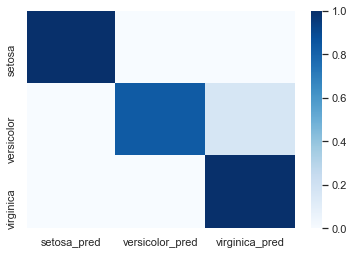

In [32]:
sns.heatmap(confusion_pd, cmap="Blues")